In [121]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
df = pd.read_csv("attendance_stadiums_weather.csv")

In [123]:
df.columns

Index(['date', 'clock', 'stadium_x', 'attendance', 'home_team', 'goals_home',
       'away_team', 'away_goals', 'home_possessions', 'away_possessions',
       'home_shots', 'away_shots', 'home_on', 'away_on', 'home_off',
       'away_off', 'home_blocked', 'away_blocked', 'home_pass', 'away_pass',
       'home_chances', 'away_chances', 'home_corners', 'away_corners',
       'home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'links', 'home_team_clean', 'confederation', 'stadium_y', 'city',
       'hometeams', 'capacity', 'country', 'ioc', 'population', 'location',
       'min_temp_°c', 'max_temp_°c', 'rain_mm', 'humidity_%', 'cloud_cover_%',
       'wind_speed_km/h', 'wind_direction', 'wind_direction_numerical',
       'avg_temp_c'],
      dtype='object')

In [124]:
df['capacity_fill'] = df['attendance'] / df['capacity']
df['capacity_fill'] = df['capacity_fill'].clip(upper=1)
#capped at 1 as data is not consistent and some attendance recorded is more than the the capacity recorded in the data

In [125]:
display(df)

,date,clock,stadium_x,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,...,min_temp_°c,max_temp_°c,rain_mm,humidity_%,cloud_cover_%,wind_speed_km/h,wind_direction,wind_direction_numerical,avg_temp_c,capacity_fill
0,2023-05-28,16:30:00,emirates_stadium,60095.0,arsenal,5,wolverhampton_wanderers,0,51.0,49.0,...,8.0,21.0,0.0,64.0,43.0,14.0,NE,45.0,14.5,1.000000
1,2023-05-28,16:30:00,villa_park,42212.0,aston_villa,2,brighton_and_hove_albion,1,40.3,59.7,...,9.0,17.0,0.3,78.0,64.0,15.0,SE,135.0,13.0,0.988988
2,2023-05-28,16:30:00,gtech_community_stadium,17120.0,brentford,1,manchester_city,0,34.4,65.6,...,8.0,21.0,0.0,64.0,43.0,14.0,NE,45.0,14.5,1.000000
3,2023-05-28,16:30:00,stamford_bridge,40130.0,chelsea,1,newcastle_united,1,64.4,35.6,...,8.0,21.0,0.0,64.0,43.0,14.0,NE,45.0,14.5,0.963945
4,2023-05-28,16:30:00,selhurst_park,25198.0,crystal_palace,1,nottingham_forest,1,66.0,34.0,...,8.0,21.0,0.0,64.0,43.0,14.0,NE,45.0,14.5,0.989865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2022-08-06,15:00:00,"st_james'_park,_newcastle",52245.0,newcastle_united,2,nottingham_forest,0,61.4,38.6,...,10.0,19.0,0.0,69.0,60.0,16.0,W,270.0,14.5,0.997918
433,2022-08-06,15:00:00,tottenham_hotspur_stadium,61732.0,tottenham_hotspur,4,southampton,1,57.5,42.5,...,13.0,26.0,0.0,37.0,22.0,7.0,S,180.0,19.5,0.680978
434,2022-08-06,15:00:00,tottenham_hotspur_stadium,61732.0,tottenham_hotspur,4,southampton,1,57.5,42.5,...,13.0,26.0,0.0,37.0,22.0,7.0,S,180.0,19.5,1.000000
435,2022-08-06,17:30:00,goodison_park,39254.0,everton,0,chelsea,1,37.3,62.7,...,11.0,18.0,0.3,71.0,63.0,9.0,W,270.0,14.5,0.991388


In [126]:
df[['attendance', 'capacity_fill']].corr()

,attendance,capacity_fill
attendance,1.000000,0.000704
capacity_fill,0.000704,1.000000


### __`Raw avarage attendance against number of matches `__

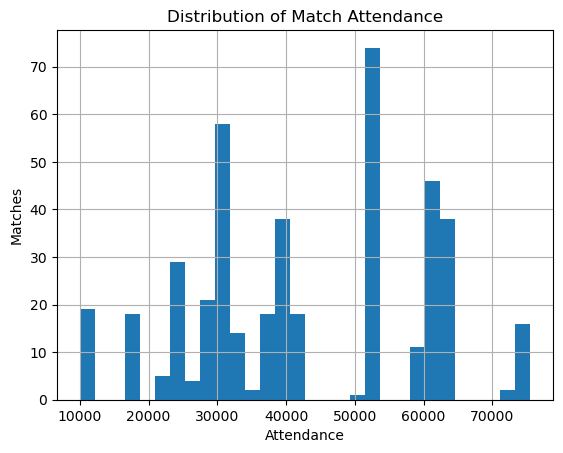

In [127]:
df['attendance'].hist(bins=30)
plt.title("Distribution of Match Attendance")
plt.xlabel("Attendance")
plt.ylabel("Matches")
plt.show()

### __`capacity fill against number of matches `__

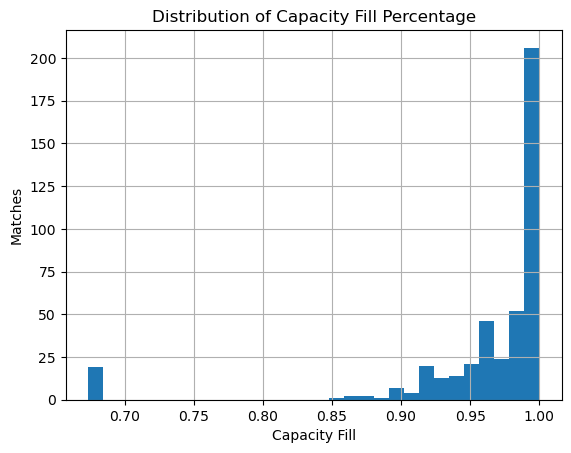

In [128]:
df['capacity_fill'].hist(bins=30)
plt.title("Distribution of Capacity Fill Percentage")
plt.xlabel("Capacity Fill")
plt.ylabel("Matches")
plt.show()

### __` soldout matches `__

In [129]:
df['sellout'] = (df['capacity_fill'] >= 0.98).astype(int) #Convert the boolean values to integers
df['sellout'].mean()

0.5766590389016019

### __` Kick off time impact `__

In [130]:
df['kickoff_hour'] = df['clock'].astype(str).str[:2].astype(int) #Simplyfied the time just to the hour and Converted the boolean values to integers
df.groupby('kickoff_hour')['capacity_fill'].mean()

kickoff_hour
12    0.964539
13    0.919916
14    0.971269
15    0.958348
16    0.950579
17    0.961743
19    0.972652
20    0.972715
Name: capacity_fill, dtype: float64

### __` Kick off time impact Visualization `__

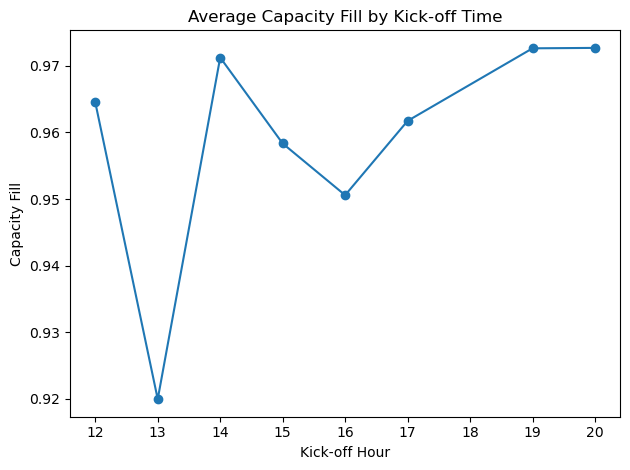

In [131]:
df.groupby('kickoff_hour')['capacity_fill'].mean().plot(marker='o')
plt.title("Average Capacity Fill by Kick-off Time")
plt.xlabel("Kick-off Hour")
plt.ylabel("Capacity Fill")
plt.tight_layout()
plt.show()

### __`Weather effects`__

In [132]:
df['rain_mm'].unique()

array([ 0. ,  0.3,  0.7,  0.2,  0.1,  0.4,  0.9,  2. ,  3.7, 11.2,  6.1,
       12.4,  8.2,  6.9,  5.4,  1. , 15.5,  6.7,  6.2, 11.3, 11.7,  0.8,
        5.5,  1.2,  1.8,  1.6,  8.1,  1.5,  7.1,  4. ,  5.3,  2.1,  0.5,
        3.9,  7.5,  0.6,  3.6,  1.1,  3.5,  4.2, 19.7, 15.8,  1.3,  2.6,
        8.7,  8.4,  3.1,  2.5, 16.1, 10. ,  9.2, 13.3,  6.8,  6.4,  4.5,
       12. ,  5.9, 14.1,  9.1, 18.6, 11.4,  3.3,  5.8, 16.3,  4.1, 14.7,
       20.7,  1.4,  2.4,  6.5,  3.2, 29.9, 20. , 19. , 24.5,  4.3,  2.3,
        5. ,  7.4, 10.7,  2.7,  9.4,  7.3])

In [133]:
df['rain'] = (df['rain_mm']> 15).astype(int)
df.groupby('rain')['capacity_fill'].mean()
# 0 means rain is less than 15 mm
# 1 means rain is more than 15 mm

rain
0    0.963402
1    0.955341
Name: capacity_fill, dtype: float64

In [134]:
df['humidity_%'].unique()

array([64., 78., 71., 85., 72., 80., 73., 81., 60., 74., 66., 77., 68.,
       83., 82., 92., 94., 96., 70., 87., 95., 89., 90., 61., 59., 56.,
       88., 75., 76., 69., 65., 79., 62., 55., 91., 84., 97., 63., 93.,
       86., 67., 57., 49., 54., 58., 32., 34., 40., 36., 42., 37., 39.])

In [135]:
df['humid']=(df['humidity_%'] > 80).astype(int)
df.groupby('humid')['capacity_fill'].mean()
# 0 means humidity is less than 80%
# 1 means rain is more than 80%

humid
0    0.961993
1    0.965181
Name: capacity_fill, dtype: float64

In [136]:
big_six = ["arsenal", "manchester_city", "liverpool","manchester_united", "chelsea", "tottenham"]
df['big_opponents'] = (df['home_team'].isin(big_six) & df['away_team'].isin(big_six)).astype(int)
big = df.groupby('big_opponents')['capacity_fill'].mean()
# 0 means big six teams are not playing each other
# 1 means big six teams are playing each other

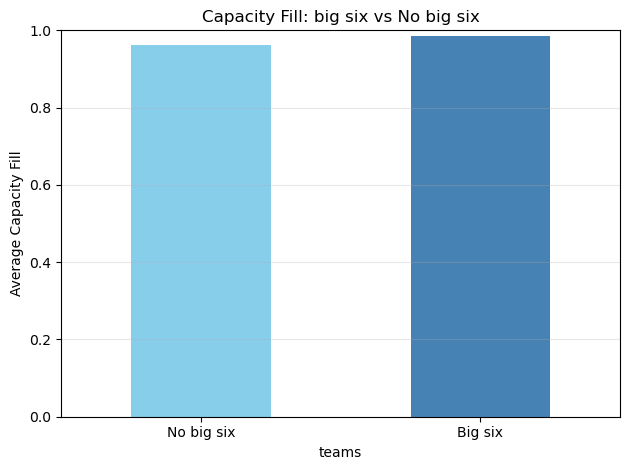

In [137]:
big.plot(kind='bar', color=['skyblue', 'steelblue'])
plt.title('Capacity Fill: big six vs No big six')
plt.xlabel('teams')
plt.ylabel('Average Capacity Fill')
plt.xticks([0, 1], ['No big six', 'Big six'], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [138]:
df['month'] = df['date'].astype(str).str[5:7].astype(int)
df.groupby('month')['capacity_fill'].mean()

month
1     0.957696
2     0.960677
3     0.969529
4     0.963391
5     0.969543
8     0.960085
9     0.948624
10    0.964529
11    0.953463
12    0.978991
Name: capacity_fill, dtype: float64

In [139]:
df[df['capacity_fill'] > 1.1][['date', 'stadium_x', 'attendance', 'capacity']].head()

,date,stadium_x,attendance,capacity


In [140]:

df.groupby('home_team')['capacity_fill'].agg(['mean', 'std']).sort_values('std').head(10)

,mean,std
home_team,,
arsenal,1.000000,0.000000
brentford,1.000000,0.000000
brighton_and_hove_albion,1.000000,0.000000
west_ham_united,1.000000,0.000000
everton,0.990970,0.002568
chelsea,0.960872,0.003481
liverpool,0.995966,0.003932
manchester_united,0.981597,0.004883
leeds_united,0.926667,0.006099


In [141]:
display(df)

,date,clock,stadium_x,attendance,home_team,goals_home,away_team,away_goals,home_possessions,away_possessions,...,wind_direction,wind_direction_numerical,avg_temp_c,capacity_fill,sellout,kickoff_hour,rain,humid,big_opponents,month
0,2023-05-28,16:30:00,emirates_stadium,60095.0,arsenal,5,wolverhampton_wanderers,0,51.0,49.0,...,NE,45.0,14.5,1.000000,1,16,0,0,0,5
1,2023-05-28,16:30:00,villa_park,42212.0,aston_villa,2,brighton_and_hove_albion,1,40.3,59.7,...,SE,135.0,13.0,0.988988,1,16,0,0,0,5
2,2023-05-28,16:30:00,gtech_community_stadium,17120.0,brentford,1,manchester_city,0,34.4,65.6,...,NE,45.0,14.5,1.000000,1,16,0,0,0,5
3,2023-05-28,16:30:00,stamford_bridge,40130.0,chelsea,1,newcastle_united,1,64.4,35.6,...,NE,45.0,14.5,0.963945,0,16,0,0,0,5
4,2023-05-28,16:30:00,selhurst_park,25198.0,crystal_palace,1,nottingham_forest,1,66.0,34.0,...,NE,45.0,14.5,0.989865,1,16,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,2022-08-06,15:00:00,"st_james'_park,_newcastle",52245.0,newcastle_united,2,nottingham_forest,0,61.4,38.6,...,W,270.0,14.5,0.997918,1,15,0,0,0,8
433,2022-08-06,15:00:00,tottenham_hotspur_stadium,61732.0,tottenham_hotspur,4,southampton,1,57.5,42.5,...,S,180.0,19.5,0.680978,0,15,0,0,0,8
434,2022-08-06,15:00:00,tottenham_hotspur_stadium,61732.0,tottenham_hotspur,4,southampton,1,57.5,42.5,...,S,180.0,19.5,1.000000,1,15,0,0,0,8
435,2022-08-06,17:30:00,goodison_park,39254.0,everton,0,chelsea,1,37.3,62.7,...,W,270.0,14.5,0.991388,1,17,0,0,0,8


In [142]:
df.to_csv("attendance_eda_ready.csv", index=False)